In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [9]:
df = pd.read_csv( "Classified Data" , index_col = 0 )

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [19]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [21]:
 y = df["TARGET CLASS"]

In [23]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(df.drop("TARGET CLASS" , axis = 1))

StandardScaler()

In [14]:
scaled_features = scaler.transform(df.drop("TARGET CLASS" , axis = 1))

In [16]:
features = pd.DataFrame(data = scaled_features , columns = df.columns[0:-1])

In [25]:
features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [26]:
X = features

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 675 to 520
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTT     800 non-null    float64
 1   PTI     800 non-null    float64
 2   EQW     800 non-null    float64
 3   SBI     800 non-null    float64
 4   LQE     800 non-null    float64
 5   QWG     800 non-null    float64
 6   FDJ     800 non-null    float64
 7   PJF     800 non-null    float64
 8   HQE     800 non-null    float64
 9   NXJ     800 non-null    float64
dtypes: float64(10)
memory usage: 68.8 KB


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
predictions = knn.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(confusion_matrix(y_test,predictions))

[[99 11]
 [ 5 85]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       110
           1       0.89      0.94      0.91        90

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [41]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

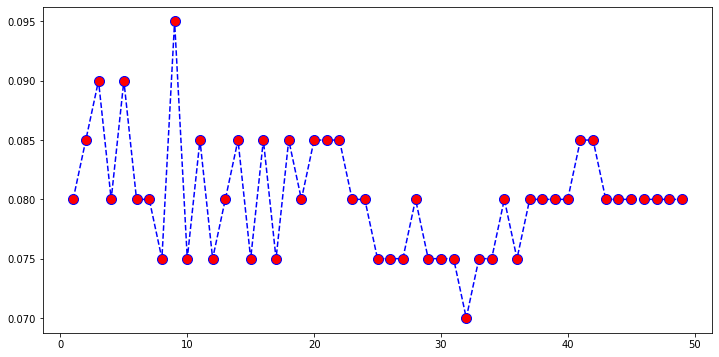

In [68]:
plt.figure(figsize = (12,6))
plt.plot(range(1,50) , error_rate , "b--" , marker = "o" , markerfacecolor = "red" , markersize = 10)

In [75]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [76]:
print("Confusion matrix : ")
print(confusion_matrix(y_test , predictions))
print("\nClassification report : ")
print(classification_report(y_test , predictions))

Confusion matrix : 
[[99 11]
 [ 3 87]]

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       110
           1       0.89      0.97      0.93        90

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

